In [37]:
"""
This module provides analytics endpoints for retrieving and visualizing
expense data. It includes routes to generate visualizations for expenses
from the last 7 days, the last one month, and by category.
"""
import sys, pprint
sys.path.append("/workspaces/MoneyManager")
import base64
import io
from datetime import datetime, timedelta
from typing import Optional

import matplotlib.pyplot as plt
import pandas as pd
from fastapi import APIRouter, Header, HTTPException
from fastapi.responses import HTMLResponse
from motor.motor_asyncio import AsyncIOMotorClient

from api.config import MONGO_URI
from api.utils.auth import verify_token

# MongoDB setup
client: AsyncIOMotorClient = AsyncIOMotorClient(MONGO_URI)
db = client.mmdb
expenses_collection = db.expenses
accounts_collection = db.accounts

router = APIRouter(prefix="/analytics", tags=["Analytics"])



In [48]:
from datetime import datetime, timedelta

# Define the date range (last 7 days)
x_days = 60 ## INPUT
seven_days_ago = datetime.now() - timedelta(days=x_days)

# Define the query filter
date_filter = {"date": {"$gte": seven_days_ago}}

# Fetch documents
expenses = await expenses_collection.find(date_filter).to_list(length=1000)
pprint.pprint(expenses)


[{'_id': ObjectId('6724032b8c1b4460b0741189'),
  'account_name': 'abc',
  'amount': 100.0,
  'category': 'Food',
  'currency': 'USD',
  'date': datetime.datetime(2024, 10, 1, 22, 22, 35, 102000),
  'description': None,
  'user_id': '6723e84242163f8755603857'},
 {'_id': ObjectId('672403588c1b4460b074118a'),
  'account_name': 'abc',
  'amount': 15.0,
  'category': 'Groceries',
  'currency': 'USD',
  'date': datetime.datetime(2024, 10, 31, 22, 23, 20, 515000),
  'description': None,
  'user_id': '6723e84242163f8755603857'},
 {'_id': ObjectId('672403698c1b4460b074118b'),
  'account_name': 'abc',
  'amount': 57.0,
  'category': 'Transport',
  'currency': 'USD',
  'date': datetime.datetime(2024, 10, 31, 22, 23, 37, 607000),
  'description': None,
  'user_id': '6723e84242163f8755603857'},
 {'_id': ObjectId('6724037a8c1b4460b074118c'),
  'account_name': 'abc',
  'amount': 29.0,
  'category': 'Utilities',
  'currency': 'USD',
  'date': datetime.datetime(2024, 10, 25, 22, 23, 54, 698000),
  'des

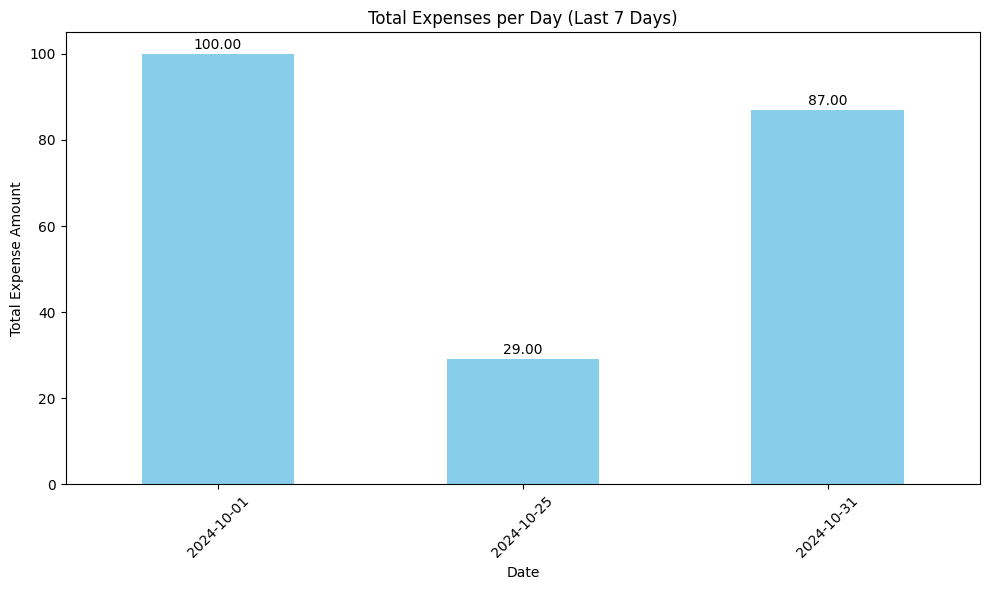

In [49]:
# Convert to DataFrame
df = pd.DataFrame(expenses)

# Ensure date is in datetime format and group by date to sum expenses
df['date'] = pd.to_datetime(df['date'])
daily_expenses = df.groupby(df['date'].dt.date)['amount'].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
ax = daily_expenses.plot(kind='bar', color='skyblue')
plt.title("Total Expenses per Day (Last 7 Days)")
plt.xlabel("Date")
plt.ylabel("Total Expense Amount")
plt.xticks(rotation=45)
plt.tight_layout()

# Adding labels on top of each bar
for i, value in enumerate(daily_expenses):
    ax.text(i, value + 0.5, f"{value:.2f}", ha="center", va="bottom", fontsize=10, color="black")

# Display the plot
plt.show()